In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
lb_make=LabelEncoder()
import  numpy as np
from sklearn.metrics import confusion_matrix


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
missing_values = ["n/a", "na", "Infinity", "NaN","nan","-","excel","?","#DIV/0!","aza"]
df = pd.read_csv("df_training_DAE.csv", na_values = missing_values, engine='python', skipinitialspace=True)
df=df.fillna(df.median())


In [4]:
X = df.drop('class3', axis=1)
y = df['class3']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler to input features and transform data
X = scaler.fit_transform(X)
X_train=X 
y_train=y

In [5]:
# Define the DNN model architecture
model = keras.Sequential([
    keras.layers.Dense(200, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the DNN model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [6]:
'''
from tensorflow import keras
from keras.layers import Dropout

model = keras.Sequential([
    keras.layers.Dense(200, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),  # Dropout 50% of the nodes
    keras.layers.Dense(200, activation='relu'),
    Dropout(0.5),  # Again, dropout 50% of the nodes
    keras.layers.Dense(200, activation='relu'),
    Dropout(0.5),  # And once more
    keras.layers.Dense(1, activation='sigmoid')
])
# Compile the DNN model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])'''

"\nfrom tensorflow import keras\nfrom keras.layers import Dropout\n\nmodel = keras.Sequential([\n    keras.layers.Dense(200, input_dim=X_train.shape[1], activation='relu'),\n    Dropout(0.5),  # Dropout 50% of the nodes\n    keras.layers.Dense(200, activation='relu'),\n    Dropout(0.5),  # Again, dropout 50% of the nodes\n    keras.layers.Dense(200, activation='relu'),\n    Dropout(0.5),  # And once more\n    keras.layers.Dense(1, activation='sigmoid')\n])\n# Compile the DNN model\nmodel.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])"

In [7]:

# Train the DNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=250, validation_split=0.1)

Epoch 1/10
2364/2364 [==============================] - 11s 4ms/step - loss: 0.5217 - accuracy: 0.7256 - val_loss: 0.5889 - val_accuracy: 0.6083
Epoch 2/10
2364/2364 [==============================] - 9s 4ms/step - loss: 0.5126 - accuracy: 0.7307 - val_loss: 0.6008 - val_accuracy: 0.5782
Epoch 3/10
2364/2364 [==============================] - 9s 4ms/step - loss: 0.5104 - accuracy: 0.7314 - val_loss: 0.5950 - val_accuracy: 0.5755
Epoch 4/10
2364/2364 [==============================] - 11s 4ms/step - loss: 0.5094 - accuracy: 0.7316 - val_loss: 0.5672 - val_accuracy: 0.6065
Epoch 5/10
2364/2364 [==============================] - 10s 4ms/step - loss: 0.5090 - accuracy: 0.7320 - val_loss: 0.5897 - val_accuracy: 0.5862
Epoch 6/10
2364/2364 [==============================] - 9s 4ms/step - loss: 0.5086 - accuracy: 0.7322 - val_loss: 0.5423 - val_accuracy: 0.6187
Epoch 7/10
2364/2364 [==============================] - 9s 4ms/step - loss: 0.5082 - accuracy: 0.7324 - val_loss: 0.5660 - val_accura

In [8]:
#torch.save(model.state_dict(), 'CDAE_model.pth')
model.save('DNN-DAE-IIoT-traintest.h5')

In [9]:
pwd

'C:\\adversarial_analysis-master\\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\\XAAE-IIoT\\CDAE_DAE\\Cleaned_DAE_IIoT'

In [11]:
df11 = pd.read_csv("df_testing_DAE.csv", na_values = missing_values, engine='python', skipinitialspace=True)

#only for off-bal
#df11.iloc[:, -1] = df11.iloc[:, -1].replace({ "attack":1, "normal":0})
df11=df11.fillna(df11.median())
X_test=df11.iloc[:, :-1]
X_test=scaler.fit_transform(X_test)
y_test =df11.iloc[:, -1]

Accuracy:  0.6829832854149408
Precision:  0.6079019580484628
Recall:  0.9817109809223374
F1-score:  0.750854516731294
ROC AUC score:  0.6907807431781732


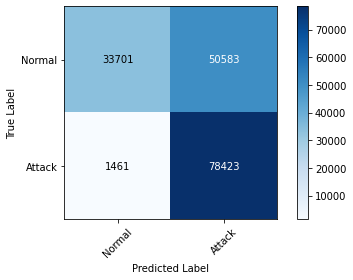

In [13]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print out evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("ROC AUC score: ", roc_auc)
import numpy as np
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

#[[TN, FP],
 #[FN, TP]]
class_names = [ 'Normal','Attack']
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=False, class_names=class_names,
                                colorbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')   
plt.tight_layout()                             
plt.savefig('df_testing_DAE.csv.png')

In [10]:
#cd C:\adversarial_analysis-master\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\XAAE-IIoT\CDAE_DAE\Cleaned_DAE_IIoT

C:\adversarial_analysis-master\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\XAAE-IIoT\CDAE_DAE\Cleaned_DAE_IIoT


In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model  # Or however your model is defined or loaded
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'model' is loaded or defined here
# model = load_model('your_model_path.h5')  # Example for Keras model

# Define missing values and load the main DataFrame
missing_values = ["n/a", "na", "Infinity", "NaN","nan","-","excel","?","#DIV/0!","aza"]
df_main = pd.read_csv("df_testing_DAE.csv", na_values=missing_values, engine='python', skipinitialspace=True)
df_main = df_main.fillna(df_main.median())

# List of additional CSV files to combine with
csv_files =  ['DAE_FSGM-XAAE-IIoT.csv', 'DAE_BIM-XAAE-IIoT.csv', 'DAE_DF-XAAE-IIoT.csv', 'DAE_JSMA-XAAE-IIoT.csv', 'DAE_CW2-XAAE-IIoT.csv','DAE_CWinf-XAAE-IIoT.csv']


for file_name in csv_files:
    # Load and preprocess the additional DataFrame
    df_additional = pd.read_csv(file_name, na_values=missing_values, engine='python', skipinitialspace=True)
    df_additional = df_additional.fillna(df_additional.median())
    
    # Combine DataFrames
    df_combined = pd.concat([df_main, df_additional], ignore_index=True)
    
    # Prepare data for model evaluation
    #X_combined = df_combined.iloc[:, :-1]
    #y_combined = df_combined.iloc[:, -1]
    # Assuming df_combined is your combined DataFrame before splitting into X_combined and y_combined
    df_combined_clean = df_combined.dropna(subset=[df_combined.columns[-1]])
    X_combined = df_combined_clean.iloc[:, :-1]
    X_combined=scaler.fit_transform(X_combined)
    y_combined = df_combined_clean.iloc[:, -1]
    

    
    # Make predictions on the combined dataset
    #y_pred = model.predict(X_combined)
    y_pred = model.predict(X_combined)

    y_pred = (y_pred > 0.5).astype(int)

    print("NaN in y_combined:", np.isnan(y_combined).any())
    print("Inf in y_combined:", np.isinf(y_combined).any())
    print("NaN in y_pred:", np.isnan(y_pred).any())
    print("Inf in y_pred:", np.isinf(y_pred).any())

    # Evaluate performance
    accuracy = accuracy_score(y_combined, y_pred)
    precision = precision_score(y_combined, y_pred)
    recall = recall_score(y_combined, y_pred)
    f1 = f1_score(y_combined, y_pred)
    roc_auc = roc_auc_score(y_combined, y_pred)

    # Print evaluation metrics
    print(f"Results for {file_name}:")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("ROC AUC score: ", roc_auc)

    # Plot confusion matrix
    cm = confusion_matrix(y_combined, y_pred)
    class_names = ['Normal', 'Attack']
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_names, show_absolute=True, show_normed=False, colorbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'CM_{file_name}.png')
    plt.close()


NaN in y_combined: False
Inf in y_combined: False
NaN in y_pred: False
Inf in y_pred: False
Results for DAE_FSGM-XAAE-IIoT.csv:
Accuracy:  0.6829832854149408
Precision:  0.6079019580484628
Recall:  0.9817109809223374
F1-score:  0.750854516731294
ROC AUC score:  0.6907807431781732
NaN in y_combined: False
Inf in y_combined: False
NaN in y_pred: False
Inf in y_pred: False
Results for DAE_BIM-XAAE-IIoT.csv:
Accuracy:  0.6829832854149408
Precision:  0.6079019580484628
Recall:  0.9817109809223374
F1-score:  0.750854516731294
ROC AUC score:  0.6907807431781732
NaN in y_combined: False
Inf in y_combined: False
NaN in y_pred: False
Inf in y_pred: False
Results for DAE_DF-XAAE-IIoT.csv:
Accuracy:  0.6829832854149408
Precision:  0.6079019580484628
Recall:  0.9817109809223374
F1-score:  0.750854516731294
ROC AUC score:  0.6907807431781732
NaN in y_combined: False
Inf in y_combined: False
NaN in y_pred: False
Inf in y_pred: False
Results for DAE_JSMA-XAAE-IIoT.csv:
Accuracy:  0.6829832854149408
Pr

In [24]:
pwd

'C:\\adversarial_analysis-master\\Investigating_the_Practicality_of_Adversarial_Evasion_Attacks_on_Network_Intrusion_Detection\\XAAE-IIoT\\CDAE_DAE'

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Load the model
#model = load_model('your_model_path.h5')  # Update with your model's file path

# Define missing values identifiers
missing_values = ["n/a", "na", "Infinity", "NaN", "nan", "-", "excel", "?", "#DIV/0!", "aza"]

# Load and preprocess the main testing DataFrame
df_main = pd.read_csv("df_testing_DAE.csv", na_values=missing_values, engine='python', skipinitialspace=True)
df_main = df_main.fillna(df_main.median())

# List of additional CSV files to combine with the main DataFrame
csv_files = [
    'DAE_FSGM-XAAE-IIoT.csv', 
    'DAE_BIM-XAAE-IIoT.csv', 
    'DAE_DF-XAAE-IIoT.csv', 
    'DAE_JSMA-XAAE-IIoT.csv', 
    'DAE_CW2-XAAE-IIoT.csv',
    'DAE_CWinf-XAAE-IIoT.csv'
]

for file_name in csv_files:
    print(f"Processing {file_name}...")

    # Load and preprocess the additional DataFrame
    df_additional = pd.read_csv(file_name, na_values=missing_values, engine='python', skipinitialspace=True)
    df_additional = df_additional.fillna(df_additional.median())
    
    # Combine the main DataFrame with the current additional DataFrame
    df_combined = pd.concat([df_main, df_additional], ignore_index=True)
    
    # Clean the combined DataFrame and prepare data for model evaluation
    df_combined_clean = df_combined.dropna(subset=[df_combined.columns[-1]])
    X_combined = df_combined_clean.iloc[:, :-1]
    y_combined = df_combined_clean.iloc[:, -1]

    # Make predictions on the combined dataset
    y_pred = model.predict(X_combined.values.astype(np.float32))
    y_pred = (y_pred > 0.5).astype(int)

    # Evaluate performance
    accuracy = accuracy_score(y_combined, y_pred)
    precision = precision_score(y_combined, y_pred, zero_division=0)
    recall = recall_score(y_combined, y_pred)
    f1 = f1_score(y_combined, y_pred)
    roc_auc = roc_auc_score(y_combined, y_pred)

    # Print evaluation metrics
    print(f"Results for combination with {file_name}:")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("ROC AUC score: ", roc_auc)

    # Plot and save the confusion matrix
    cm = confusion_matrix(y_combined, y_pred)
    class_names = ['Normal', 'Attack']
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_names, show_absolute=True, show_normed=False, colorbar=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix for {file_name}")
    plt.tight_layout()
    plt.savefig(f'CM_{file_name}.png')
    plt.close()

    print("--------------------------------------------------")


Processing DAE_FSGM-XAAE-IIoT.csv...
Results for combination with DAE_FSGM-XAAE-IIoT.csv:
Accuracy:  0.5138090249013206
Precision:  0.5169620253164557
Recall:  0.012781032497120825
F1-score:  0.024945332828400054
ROC AUC score:  0.5007310791074661
--------------------------------------------------
Processing DAE_BIM-XAAE-IIoT.csv...
Results for combination with DAE_BIM-XAAE-IIoT.csv:
Accuracy:  0.5138090249013206
Precision:  0.5169620253164557
Recall:  0.012781032497120825
F1-score:  0.024945332828400054
ROC AUC score:  0.5007310791074661
--------------------------------------------------
Processing DAE_DF-XAAE-IIoT.csv...
Results for combination with DAE_DF-XAAE-IIoT.csv:
Accuracy:  0.5138090249013206
Precision:  0.5169620253164557
Recall:  0.012781032497120825
F1-score:  0.024945332828400054
ROC AUC score:  0.5007310791074661
--------------------------------------------------
Processing DAE_JSMA-XAAE-IIoT.csv...
Results for combination with DAE_JSMA-XAAE-IIoT.csv:
Accuracy:  0.513809